## Imports

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('../regex'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import re
import helper
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import math

# Dataframe Retificacoes

In [3]:
files = helper.get_files_path("../data/dodfs_txt_barra_n/")
rets_final = helper.extract_multiple(files, "retificacoes", True, "../results/")
rets_final

,Tipo do Ato,Tipo de Documento,Número do documento,Data do documento,Número do DODF,Data do DODF,Página do DODF,Nome do Servidor,Matrícula,Cargo,Classe,Padrao,Matricula SIAPE,Informação Errada,Informação Corrigida
0,Retificações de Aposentadoria,Portaria coletiva,,30/03/2010,62,31/03/2010,nan,CONCEICAO DE MARIA SEREJO ROCHA,22.326-3,nan,Especial,III,nan,nan,nan
1,Retificações de Aposentadoria,Instrucao,,07/10/1998,194,13/10/1998,nan,ANTONIO FRANCISCO DE SOUZA,114.432-4,nan,nan,nan,nan,"""\nArtifice Esp. Eletronica e Comunicacoes""","""Artifice Especializado Eletricidade e Comunic..."
2,Retificações de Aposentadoria,Portaria no,92,20/12/2002,248,26/12/2002,nan,FRANCISCO ALVES BEZERRA,114.711-0,nan,nan,nan,nan,""" Artifice Especializado - Eletronica e Comuni...","""Artifice Especializado Eletricidade e\nComuni..."
3,Retificações de Aposentadoria,Portaria no,62,17/10/2002,202,21/10/2002,nan,JOAO BISPO RIBEIRO,108.814-9,nan,nan,nan,nan,""" Artifice\nEspecialidade - Eletronica Comunic...","""Artifice Especializado Eletricidade e Comunic..."
4,Retificações de Aposentadoria,Ordem de Servico no,68,05/04/2017,69,10.04.2017,nan,VITTORIA NEIDE COLLAREDA SICILIANO,138.632-8,nan,nan,nan,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,Retificações de Aposentadoria,ordem de servico n,89,02/05/2017,2019,09/05/2019,nan,nan,nan,nan,nan,nan,nan,"""121.039-\n4""","ficando ratificados os demais termos, em atend..."
58,Retificações de Aposentadoria,ordem de servico n,6,20/01/2016,14,21/01/2016,nan,ARGENTINA MARIA RIBEIRO,125.726-9,AOSD - Pat. Clinica - NA - 17 (equivalente ao...,unica,"XX""",nan,"""no Cargo de AOSD - Pat. Clinica - NA - 17 (eq...","""na carreira de Assistencia Publica a Saude, n..."
59,Retificações de Aposentadoria,ordem de servico n,29,10/03/2016,47,10/03/2016,nan,EURICEANE CAMPOS SANTOS,128.173-9,nan,nan,nan,nan,nan,nan
60,Retificações de Aposentadoria,ordem de servico n,63,03/04/2017,69,10/04/2017,nan,JOSE GERALDO DE ALMEIDA SANTOS,118.323-0,nan,nan,nan,nan,"""com vantagens previstas no artigo 1o da Lei 1...","ficando ratificados os demais termos, em atend..."


# Análise

In [4]:
def attribute_stats(name, rets_final):
    presence_name = rets_final[name].value_counts()
    total = rets_final.count()
    labels = ["Com " + name, "Sem " + name]
    size = [total[name] - presence_name[0], presence_name[0]]
    return size, labels

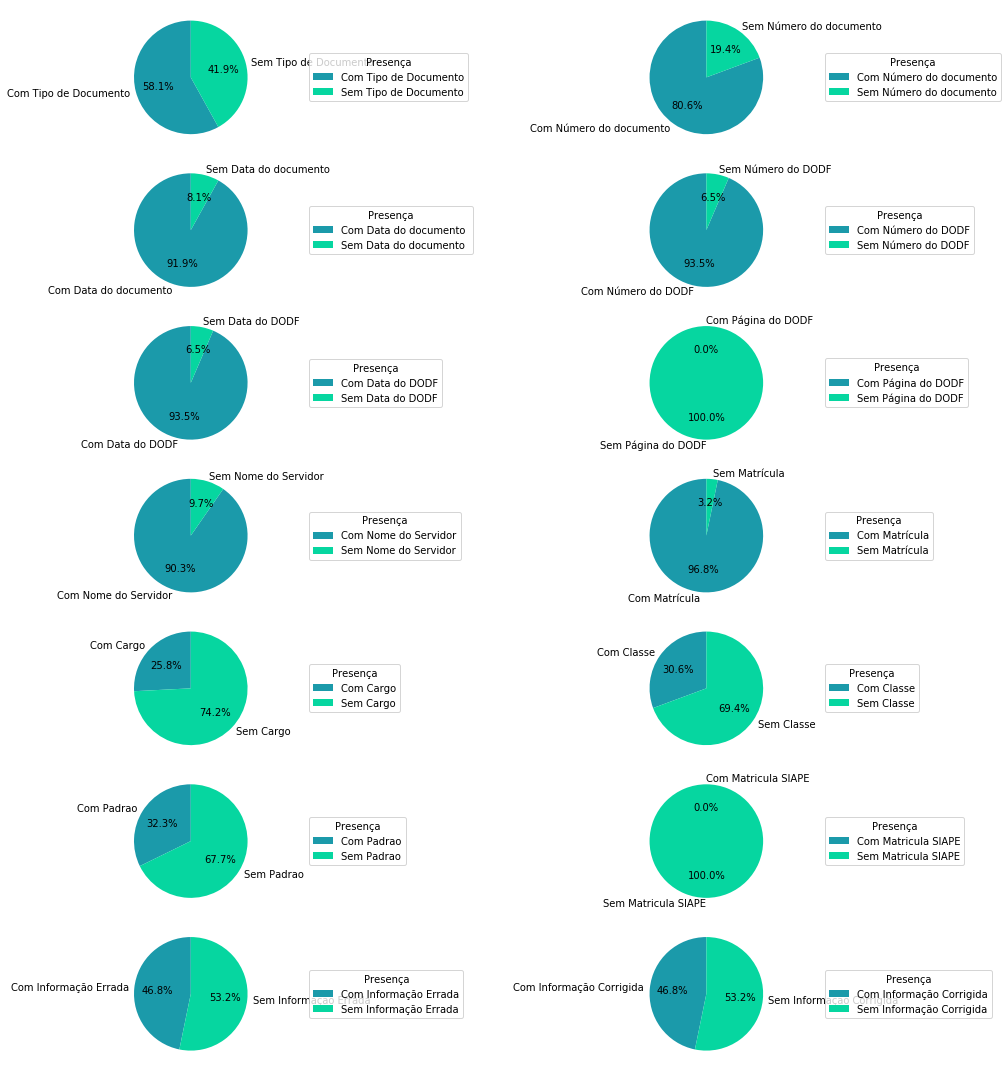

In [5]:
cor = ['#1b9aaa', '#06d6a0']
numb_attr = rets_final.shape[1]-1
grid_square = math.ceil(numb_attr/2)

grid_square = int(grid_square)
_, ax = plt.subplots(grid_square, 2, figsize=(15,15))
names = rets_final.columns[1:]
for i in range(grid_square*2):
    if i < numb_attr:
        size, labels = attribute_stats(names[i], rets_final)
        ax[math.floor(i/2), i%2].pie(size, labels=labels, autopct='%1.1f%%', startangle=90, colors=cor)
        ax[math.floor(i/2), i%2].legend(labels, title="Presença", loc='center left', bbox_to_anchor=(1.3, 0, 0.5, 1))
    else:
        ax[math.floor(i/2), i%2].axis('off')

plt.tight_layout()
plt.show()